In [14]:
import numpy as np
import pandas as pd
import pymongo
from pymongo import MongoClient
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pprint
import statsmodels.api as sm
import src.sentiment as snt
from data.get_data import get_download_links

from datetime import datetime
import boto3
import os
import re
import time
import subprocess

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
plt.style.use('ggplot')

In [4]:
links_df = get_download_links()
links_df.head()

,month,link,downloaded,size_in_bytes,comment_count
0,2005-12,https://files.pushshift.io/reddit/comments/RC_...,False,0,0
1,2006-01,https://files.pushshift.io/reddit/comments/RC_...,False,0,0
2,2006-02,https://files.pushshift.io/reddit/comments/RC_...,False,0,0
3,2006-03,https://files.pushshift.io/reddit/comments/RC_...,False,0,0
4,2006-04,https://files.pushshift.io/reddit/comments/RC_...,False,0,0


In [6]:
client = MongoClient()
db = client['myreddit']
posts_all = db['posts_all']

yearmonths = sorted(posts_all.distinct('yearmonth'))

In [7]:
posts_all.find_one()

{'_id': ObjectId('5e554d246960e0b4e8de88fd'),
 'link_id': '2cnnc',
 'title': 'Smashing interview by Ron Paul on FOX!  "Just come home"',
 'score': 61,
 'is_self': False,
 'datetime': 1186379408.0,
 'sub': 'politics',
 'permalink': '/r/politics/comments/2cnnc/smashing_interview_by_ron_paul_on_fox_just_come/',
 'yearmonth': '2007-08'}

In [104]:
def posts_containing_phrase(phrase):
    pipe = [{'$match':{'title': re.compile(phrase, re.IGNORECASE),
                       'sub': 'politics'}}, 
            {'$group': {'_id': '$yearmonth', 
                        'total': {'$sum': '$score'}, 
                        'count': {'$sum': 1}}}, 
            {'$sort': {'_id': 1}}]
    cursor = posts_all.aggregate(pipeline=pipe)
    
    df = pd.DataFrame(list(cursor)).rename({'_id': 'yearmonth', 'total': 'total score'}, axis='columns')\
                                   .set_index('yearmonth')
    score_avg = df['total score'].mean()
    count_avg = df['count'].mean()
    df['normalized score'] = df['total score'].apply(lambda x: x/score_avg)
    df['normalized count'] = df['count'].apply(lambda x: x/count_avg)
    
    return df

In [105]:
rp_df = posts_containing_phrase('ron paul')

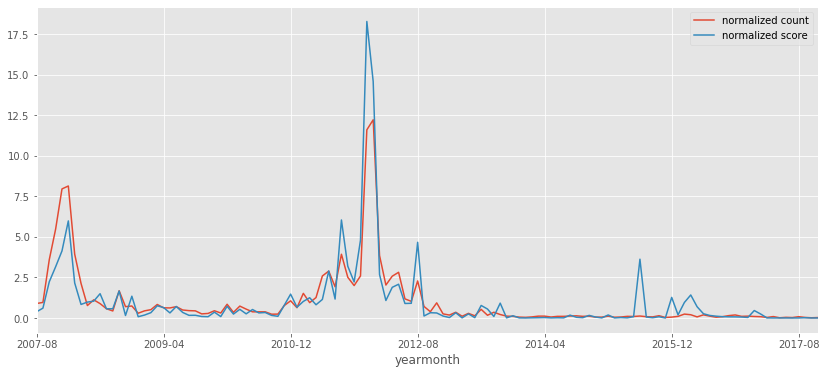

In [113]:
rp_df[['normalized count', 'normalized score']].plot(figsize=(14, 6))
# rp_df[['normalized count', 'normalized score']].plot()

In [107]:
sanders_df = posts_containing_phrase('sanders')

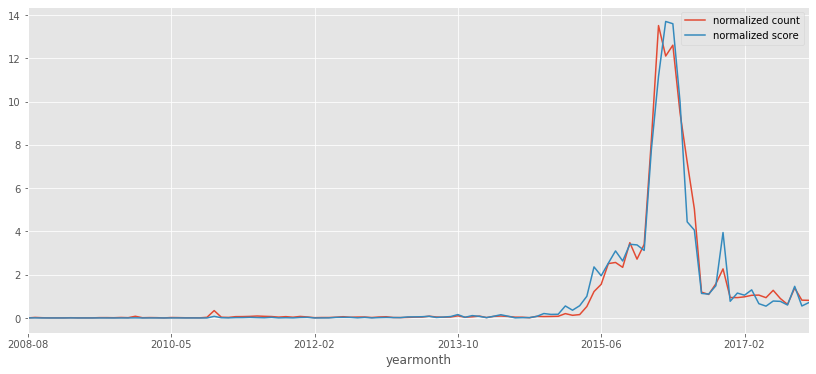

In [108]:
sanders_df[['normalized count', 'normalized score']].plot(figsize=(14, 6))